# DataLab 2: Voetbal & Data Science <a name='begin'></a>

<br>Groepsnummer: 3B
<br>Sprintnummer: 2<br>
<br>    **Busse Heemskerk** 22122877 
<br>    **Isa Dijkstra**                             22119485
<br>    **Johan Heskes**                        22132376
<br>    **Tim Oosterling**                        22078800

## Table of Contents

1. [Importeren van de dataset in Python](#dataset)
2. [Sprint 2](#spr2)
    1. [Beschrijven van de tabellen](#tabellen)
    2. [Bekijken van de data van Heracles Almelo](#hadata)
    3. [Eigen functies; Statistieken per seizoen bepalen](#define1)
        1. [get_id](#get_id)
        2. [win_loss](#win_loss)
        3. [statistiek](#statistiek)
        4. [ranglijst](#ranglijst)
    4. [Het runnen van de functies](#run1)
3. [Sprint 3](#spr3)
    1. [Prestaties van Heracles Almelo](#prestatie)
    2. [Onderzoek teameigenschappen](#team)
        1. [Aanmaken DataFrames](#dfmaken)
        2. [Visualisaties](#visu1)
    

## Importeren van de dataset in Python <a name='dataset'></a>

Voordat er gecodeerd wordt, worden de mogelijk nodige libraries voor de opdrachten geïmporteerd

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Eerst word er een connectie gemaakt met de SQL-database door middel van sqlite3, vervolgens worden de tabellen per stuk geïmporteerd door middel van Pandas.

In [2]:
connect = sqlite3.connect('database.sqlite')

country = pd.read_sql_query("SELECT * FROM Country", connect)
league = pd.read_sql_query("SELECT * FROM League", connect)
match = pd.read_sql_query("SELECT * FROM Match", connect)
player = pd.read_sql_query("SELECT * FROM Player", connect)
player_attributes = pd.read_sql_query("SELECT * FROM Player_attributes", connect)
team = pd.read_sql_query("SELECT * FROM Team", connect)
team_attributes = pd.read_sql_query("SELECT * FROM Team_attributes", connect)

Vervolgens wordt de optie om de kolommen in te korten uitgezet, daarna worden alle kolommen getoont.

In [3]:
pd.set_option("display.max_columns", None)
display(country, league, match, player, player_attributes, team, team_attributes)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


[Terug naar het begin](#begin)

# Sprint 2 <a name='spr2' ></a>

## Beschrijven van de tabellen <a name='tabellen'></a>

Hier is de beschrijving van elke tabel gegeven, waarbij de naam en de beschrijving te zien zijn. De beschrijving bevat wat er in de tabel te vinden is.

| Tabel naam | Tabel beschrijving 
|:-------------------|:---------------
Country | In deze tabel staan de namen van de landen en de daarbij horende ID's
League | In deze tabel staan de namen van de competities per land samen met landelijke ID
Match | In deze tabel staat alle informatie die met wedstrijden te maken heeft en informatie over het wedden op de wedstrijden
Player | In deze tabel staat info over alle spelers, hun fifa ID, wanneer ze jarig zijn, hun lengte (in cm) en hun gewicht (in lbs) 
Player_attributes | In deze tabel staan de statistieken en rating van elke speler in de database 
Team | In deze tabel staat de id's van de club, de volledige club naam en de afkorting van de club
Team_attributes | In deze tabel zijn de statistieken van de teams in de database vermeld. zowel offensieve als defensieve statestieken zijn hierbij inbegrepen

[Terug naar het begin](#begin)

## Bekijken van de data van Heracles Almelo <a name='hadata'></a>

Eerst word er een cell gerunt om de team ID te vinden van onze club: Heracles Almelo

In [4]:
team[team["team_long_name"] == "Heracles Almelo"]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
166,26557,9791,100634.0,Heracles Almelo,HER


De gegevens van het gekozen team staan getoond in de uitkomst van de onderstaande cell.

In [5]:
team_id = team[team['team_long_name'] == 'Heracles Almelo'].iloc[0,1]
print('Team ID:', team_id)
print('Name:', team[team['team_long_name'] == 'Heracles Almelo'].iloc[0,3])
print('Short name:', team[team['team_long_name'] == 'Heracles Almelo'].iloc[0,4])
print('Country:', 'Netherlands')
print('League id:', country[country['name'] == 'Netherlands'].iloc[0,0])
print("League name:", league[league["id"] == 13274].iloc[0,2])

Team ID: 9791
Name: Heracles Almelo
Short name: HER
Country: Netherlands
League id: 13274
League name: Netherlands Eredivisie


De gegevens van elke wedstrijd die het gekozen team heeft gespeeld per seizoen is hieronder getoond.

In [6]:
display(match[(match['home_team_api_id'] == team_id) | (match['away_team_api_id'] == team_id)])

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
13278,13279,13274,13274,2008/2009,1,2008-08-31 00:00:00,508307,9791,10235,3,1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26663.0,110116.0,26671.0,37965.0,26661.0,26664.0,26648.0,26660.0,26492.0,104045.0,NaN,34489.0,26445.0,34492.0,41462.0,30916.0,24123.0,109638.0,108038.0,30654.0,37173.0,NaN,None,None,None,None,None,None,None,None,4.33,3.25,1.80,3.80,3.40,1.80,3.90,3.3,1.75,3.75,3.3,1.8,NaN,NaN,NaN,4.20,3.40,1.70,4.75,3.50,1.73,4.35,3.40,1.70,4.00,3.40,1.80,4.33,3.30,1.73
13285,13286,13274,13274,2008/2009,10,2008-11-08 00:00:00,523734,9791,8277,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.20,3.40,3.20,2.00,3.30,3.35,2.20,3.2,2.75,2.00,3.2,3.2,NaN,NaN,NaN,2.05,3.40,2.90,2.10,3.40,3.25,2.25,3.30,2.75,2.10,3.25,3.25,2.20,3.30,2.88
13291,13292,13274,13274,2008/2009,11,2008-11-14 00:00:00,523740,9761,9791,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.40,4.50,8.00,1.45,3.75,6.35,1.45,3.8,5.40,1.44,3.6,6.5,NaN,NaN,NaN,1.40,3.75,7.00,1.44,3.75,7.00,1.45,3.80,6.50,1.47,4.00,5.75,1.50,3.75,6.00
13303,13304,13274,13274,2008/2009,12,2008-11-22 00:00:00,523752,8640,9791,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.25,5.50,12.00,1.25,5.00,10.00,1.20,5.0,10.00,1.22,5.0,10.0,NaN,NaN,NaN,1.25,5.00,10.00,1.22,5.50,13.00,1.22,5.00,11.00,1.25,5.00,10.00,1.25,5.00,10.00
13312,13313,13274,13274,2008/2009,13,2008-11-29 00:00:00,523761,9791,8525,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.30,3.25,2.80,2.30,3.35,2.70,2.30,3.2,2.50,2.25,3.4,2.6,NaN,NaN,NaN,2.15,3.30,2.80,2.50,3.25,2.63,2.25,3.40,2.65,2.35,3.30,2.80,2.30,3

[Terug naar het begin](#begin)

## Eigen functies; Statistieken per seizoen bepalen <a name='define1'></a>

Hieronder zijn 4 functies gedefineerd:

    id_zoeker
    punten
    statistiek
    ranglijst
De uitleg van alle functies staat omschreven in de docstrings

### id_zoeker <a name='id_zoeker'></a>

In [7]:
def id_zoeker(club):
    """
    Deze functie haalt het ID-nummer van de gegeven club op
    
    Parameters
    ----------
    club : str 
        De volledige naam van de club, waarvan je het ID wilt weten
    
    Returns
    ----------
    id : integer
        Het ID-nummer van de gekozen club
        
    """
    
    #Filteren
    id = team[team['team_long_name'] == club].iloc[0,1]
    return id

[Terug naar het begin](#begin)

### punten <a name='punten'></a>

In [8]:
def punten(club, seizoen):
    """
    Deze functie maakt, op basis van een club en een seizoen, 2 kolommen aan. Eén over het aantal punten en één over 
    of de wedstrijd thuis of uit was voor het gekozen team.
    
    Parameters
    ----------
    club : str 
        De volledige naam van de club, waarvan je wilt weten hoeveel er gescoord is
    
    seizoen : str
        Het speel seizoen waar je de data van wilt weten
    
    Returns
    ----------
    wed : Pandas DataFrame
        Een dataframe gebaseerd op match, waarbij alleen de data van de aangegeven club en seizoen wordt getoond
    
    """
    
    #Aanmaken van een nieuwe gefilterde dataset en 2 lege lists
    wed = match[((match['home_team_api_id'] == id_zoeker(club)) | (match['away_team_api_id'] == id_zoeker(club))) & (match['season'] == seizoen)]
    punten_ = []
    tu = []
    
    #Beginnen van een loop om de lijsten te vullen
    loop = 0
    for i in list(wed['home_team_api_id']):
        #If-statement voor wanneer het team thuis of uit speelt
        if list(wed['home_team_api_id'])[loop] == id_zoeker(club):
            #If-statement voor wanneer het team meer of minder doelpunten heeft gescoord om te kijken naar winst, gelijk en verlies
            if list(wed['home_team_goal'])[loop] > list(wed['away_team_goal'])[loop]:
                punten_.append(3)
                tu.append('thuis')
            elif list(wed['home_team_goal'])[loop] == list(wed['away_team_goal'])[loop]:
                punten_.append(1)
                tu.append('thuis')
            else:
                punten_.append(0)
                tu.append('thuis')
        else:
            #If-statement voor wanneer het team meer of minder doelpunten heeft gescoord om te kijken naar winst, gelijk en verlies
            if list(wed['away_team_goal'])[loop] > list(wed['home_team_goal'])[loop]:
                punten_.append(3)
                tu.append('uit')
            elif list(wed['away_team_goal'])[loop] == list(wed['home_team_goal'])[loop]:
                punten_.append(1)
                tu.append('uit')
            else:
                punten_.append(0)
                tu.append('uit')
        loop += 1
        
    #Aanmaken van copy en 2 nieuwe kolommen
    wed = wed.copy()
    wed.loc[:, 'punten'] = punten_
    wed.loc[:, 'thuis / uit'] = tu
    return wed

[Terug naar het begin](#begin)

### statistiek <a name='statistiek'></a>

In [9]:
def statistiek(club, seizoen):
    """
    Deze functie laat de statistieken zien over de gegeven club in het gegeven seizoen. 
    
    Parameters
    ----------
    club : str 
        De volledige naam van de club, waarvan je de statistieken wilt weten
    
    seizoen : str
        Het speel seizoen waar je de data van wilt weten
    
    Returns
    ----------
    df : Pandas DataFrame
        Een dataframe waarin de naam, het aantal wedstrijden, het aantal punten, het gemiddelde aantal punten 
        per wedstrijd en de winst percentages staan
    
    """
    
    #Aanmaken van 2 aparte dataframes voor percentages
    t = punten(club, seizoen)[punten(club, seizoen)['thuis / uit'] == 'thuis']
    u = punten(club, seizoen)[punten(club, seizoen)['thuis / uit'] == 'uit']
    
    #Maken van een list met alle benodigde data voor het dataframe 
    stats = [[club,
            seizoen,
            len(punten(club, seizoen)),
            sum(punten(club, seizoen)['punten']),
            round(sum(punten(club, seizoen)['punten'] / len(punten(club, seizoen)['punten'])), 2),
            round(t[t['punten'] == 3]['punten'].count() / t['punten'].count() * 100, 2),
            round(t[t['punten'] == 1]['punten'].count() / t['punten'].count() * 100, 2),
            round(t[t['punten'] == 0]['punten'].count() / t['punten'].count() * 100, 2),
            round(u[u['punten'] == 3]['punten'].count() / u['punten'].count() * 100, 2),
            round(u[u['punten'] == 1]['punten'].count() / u['punten'].count() * 100, 2),
            round(u[u['punten'] == 0]['punten'].count() / u['punten'].count() * 100, 2)]]
    
    #Maken van het dataframe
    df = pd.DataFrame(stats, columns =['team',
                                       'seizoen',
                                       'wedstrijden', 
                                       'punten',
                                       'gemiddeld_punten',
                                       'thuis_win%',
                                       'thuis_gelijk%',
                                       'thuis_verlies%',
                                       'uit_win%',
                                       'uit_gelijk%',
                                       'uit_verlies%'])
       
    return df

[Terug naar het begin](#begin)

### ranglijst <a name='ranglijst'></a>

In [10]:
load_screen = ["Welcome to this journey!..............................................",    
                       "Preparing to load dataset.............................................",    
                       "Checking for missing files...............................................",    
                       "Initializing data structures................................................",    
                       "Setting up parameters.....................................................",    
                       "Loading feature vectors................................................",    
                       "Applying pre-processing steps......................................",    
                       "Filtering out invalid samples.............................................",    
                       "Compiling statistics.......................................................",    
                       "Normalizing data...........................................................",    
                       "Building training and test sets..........................................",    
                       "Cross-validating models.................................................",   
                       "Fine-tuning hyperparameters..........................................",    
                       "Evaluating performance metrics....................................",    
                       "The dataset is almost loaded!........................................"]

def ranglijst(league_naam,seizoen):
    """
    Deze functie laat de ranglijst zien over de gegeven league in het gegeven seizoen. 
    
    Parameters
    ----------
    league_naam : str 
        De naam van de league waarvan je de ranglijst wilt bepalen
    
    seizoen : str
        Het speel seizoen waar je de data van wilt weten
    
    Returns
    ----------
    df : Pandas DataFrame
        Een dataframe waarin de data van het gegeven seizoen staat op volgorde van de behaalde punten
        
    """
    
    #Filteren voor het maken van een lijst met alle team namen in een league
    league_id = league[league['name']== league_naam].iloc[0,1]
    seizoen_filter = match[match['season'] == seizoen]
    team_ids = set(list(seizoen_filter[seizoen_filter['league_id'] == league_id]['home_team_api_id']))
    team_ids = list(team_ids)
    
    #Maken van een lijst met alle team namen in een league
    team_names = []
    for i in team_ids:
        team_names.append(team[team['team_api_id'] == i].iloc[0,3])
    
    #Aanmaken dataframe voor gebruik    
    df = statistiek(team_names[0],seizoen)

    #Loopen over de list met team namen om het dataframe vol te zetten
    print('stats season', seizoen, 'from', league_naam)
    for i in range(1, len(team_names)):
        df = pd.concat([df, statistiek(team_names[i], seizoen)])
        print(str(round(100/(len(team_names)+1)*i,2))+'%', load_screen[(i-1)%15], end = '\r')
    print('100.0% This adventure was brought to you by Group 3B.........')
    
    #Sorteren van het dataframe op basis van behaalde punten
    df = df.sort_values(by='punten', ascending = False).set_index('team')
    
    return df 

[Terug naar het begin](#begin)

## Het runnen van de functies <a name='run1'></a>
Hieronder worden de functies statistiek en ranglijst uitgevoerd:

In [11]:
statistiek('Heracles Almelo', '2009/2010')

,team,seizoen,wedstrijden,punten,gemiddeld_punten,thuis_win%,thuis_gelijk%,thuis_verlies%,uit_win%,uit_gelijk%,uit_verlies%
0,Heracles Almelo,2009/2010,34,56,1.65,64.71,5.88,29.41,35.29,23.53,41.18


In [12]:
ranglijst('Netherlands Eredivisie', '2008/2009')

stats season 2008/2009 from Netherlands Eredivisie
100.0% This adventure was brought to you by Group 3B...............................


,seizoen,wedstrijden,punten,gemiddeld_punten,thuis_win%,thuis_gelijk%,thuis_verlies%,uit_win%,uit_gelijk%,uit_verlies%
team,,,,,,,,,,
AZ,2008/2009,34,80,2.35,82.35,5.88,11.76,64.71,23.53,11.76
FC Twente,2008/2009,34,69,2.03,70.59,23.53,5.88,47.06,29.41,23.53
Ajax,2008/2009,34,68,2.00,76.47,17.65,5.88,47.06,11.76,41.18
PSV,2008/2009,34,65,1.91,64.71,23.53,11.76,47.06,23.53,29.41
SC Heerenveen,2008/2009,34,60,1.76,64.71,29.41,5.88,35.29,23.53,41.18
FC Groningen,2008/2009,34,56,1.65,64.71,5.88,29.41,35.29,23.53,41.18
Feyenoord,2008/2009,34,45,1.32,47.06,29.41,23.53,23.53,23.53,52.94
NAC Breda,2008/2009,34,45,1.32,41.18,17.65,41.18,35.29,17.65,47.06
FC Utrecht,2008/2009,34,44,1.29,47.06,23.53,29.41,17.65,41.18,41.18


In [13]:
team[team["team_api_id"] == 6601]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
170,26561,6601,NaN,FC Volendam,VOL


#### Einde Sprint 2

[Terug naar het begin](#begin)

# Sprint 3 <a name='spr3'></a>

Eerst word er een functie gemaakt om queries met SQL code te kunnen lezen.

In [14]:
def sql_lezer(func):
    """
    Voert de gegeven SQL-query uit op de database en geeft het resultaat terug als een Pandas DataFrame.

    Parameters
    ----------
    query : str
        De SQL-query die moet worden uitgevoerd.

    Returns
    -------
    df : Pandas DataFrame
        Een DataFrame met het resultaat van de query.
    """
    def wrapper(*args, **kwargs):
        query = func(*args, **kwargs)
        df = pd.read_sql(query, connect)
        return df
    return wrapper

## Prestaties van Heracles Almelo <a name='prestatie'></a>

In de volgende cellen code wordt er gekeken naar de prestaties van ons team, Heracles Almelo. Eerst wordt er bekeken hoeveel wedstrijden er in elk seizoen zijn gespeeld.

In [15]:
@sql_lezer
def games(team_id):
    """
    Haalt het aantal gespeelde wedstrijden op van een bepaald team voor elk seizoen.

    Parameters
    ----------
    team_id : int
        Het team ID van het team waarvan het aantal gespeelde wedstrijden wordt opgehaald.

    Returns
    -------
    df : Pandas DataFrame
        Een DataFrame met het aantal gespeelde wedstrijden door het opgegeven team voor elk seizoen, 
        met kolommen voor seizoen en Games_played.
    """
    
    query = f"""
        SELECT season
                    , COUNT(DISTINCT(match_api_id)) AS Games_played
            FROM match
        
        WHERE (home_team_api_id = {team_id}) OR (away_team_api_id = {team_id})
        
        GROUP BY season
    """
    return query

games(9791)

,season,Games_played
0,2008/2009,34
1,2009/2010,34
2,2010/2011,34
3,2011/2012,34
4,2012/2013,34
5,2013/2014,34
6,2014/2015,34
7,2015/2016,34


Vervolgens wordt er gekeken naar het aantal gespeelde wedstrijden in het jaar 2010.

In [16]:
@sql_lezer
def games_in_2010(team_id):
    """
    Haalt het aantal gespeelde wedstrijden op van een bepaald team in het jaar 2010.

    Parameters
    ----------
    team_id : int
        Het team ID van het team waarvan het aantal gespeelde wedstrijden wordt opgehaald.

    Returns
    -------
    df : Pandas DataFrame
        Een DataFrame met het aantal gespeelde wedstrijden door het opgegeven team in het jaar 2010, 
        met kolommen voor seizoen en Games_played.
    """
    
    query = f"""
        SELECT season
                    , COUNT(DISTINCT(match_api_id)) AS Games_played
            FROM match
        
        WHERE ((home_team_api_id = {team_id}) OR (away_team_api_id = {team_id})) 
        And (date BETWEEN '2010-01-01 00:00:00' AND '2010-12-31 00:00:00' )
        
        GROUP BY season

    """
    return query

games_in_2010(9791)

,season,Games_played
0,2009/2010,16
1,2010/2011,18


Nu wordt er gekeken naar het aantal punten per seizoen in de gehele competitie, de Nederlandse Eredivisie.

In [17]:
@sql_lezer
def punten_per_seizoen(league_id):
    """
    Haalt de punten op van elk team per seizoen in de opgegeven competitie.

    Parameters
    ----------
    league_id : int
        Het ID van de competitie waarvan de punten van elk team per seizoen worden opgehaald.

    Returns
    -------
    df : Pandas DataFrame
        Een DataFrame met de punten van elk team per seizoen in de opgegeven competitie,
        met kolommen voor league_id, season, Team_ID, Home_Points, Away_Points en Total_Points.
        De resultaten zijn gesorteerd op seizoen en totale punten in aflopende volgorde.
    """
    
    query = f""" 
        SELECT h.league_id
                    , h.season
                    , h.Team_ID
                    , h.Points AS Home_Points
                    , a.Points AS Away_Points
                    , (h.Points + a.Points) AS Total_Points
                
            FROM (SELECT league_id
                                    , season
                                    , home_team_api_id AS Team_ID
                                    , SUM(CASE WHEN (home_team_goal > away_team_goal) THEN 3
                                                          WHEN (home_team_goal = away_team_goal) THEN 1
                                                          WHEN (home_team_goal < away_team_goal) THEN 0
                                                          END) AS Points
                            FROM match
                            WHERE league_id = {league_id}
                            GROUP BY season
                                            , Team_ID) AS h
                        
        JOIN (SELECT league_id
                                , season
                                , away_team_api_id AS Team_ID
                                , SUM(CASE WHEN (away_team_goal > home_team_goal) THEN 3
                                                      WHEN (away_team_goal = home_team_goal) THEN 1
                                                      WHEN (away_team_goal < home_team_goal) THEN 0
                                                      END) AS Points
                    FROM match
                    WHERE league_id = {league_id}
                    GROUP BY season
                                    , Team_ID) AS a 
            ON h.season = a.season AND h.Team_ID = a.Team_ID
                    
        ORDER BY h.season, Total_Points DESC;
    """
    return query

punten_per_seizoen(13274)

,league_id,season,Team_ID,Home_Points,Away_Points,Total_Points
0,13274,2008/2009,10229,43,37,80
1,13274,2008/2009,8611,40,29,69
2,13274,2008/2009,8593,42,26,68
3,13274,2008/2009,8640,37,28,65
4,13274,2008/2009,10228,38,22,60
...,...,...,...,...,...,...
139,13274,2015/2016,9803,15,19,34
140,13274,2015/2016,10218,17,13,30
141,13274,2015/2016,8525,15,14,29
142,13274,2015/2016,8526,15,8,23


[Terug naar het begin](#begin)

## Onderzoek teameigenschappen <a name='team'></a>

### Aanmaken DataFrames <a name='dfmaken'></a>

Voordat er begonnen word met het onderzoek word er, met behulp van een eigen functie, een kolom aangemaakt om twee dataframes te kunnen mergen.

In [18]:
#maak season kolom aan zodat daar op ge merged kan worden
def kolom_seizoen(df, col):
    """
    Geeft een lijst van seizoenen terug op basis van de maanden in een kolom van een pandas DataFrame.

    Parameters:
    -----------------
    df: Pandas DataFrame
        Het DataFrame waaruit de maanden worden gehaald
        
    col: str
        De naam van de kolom waaruit de maanden worden gehaald

    Returns:
    ------------
    season_list: list
        Een lijst van seizoenen in de vorm 'jaar/jaar', waarbij het jaar eindigt in juli.
    """
        
    season_list = []
    for i in df[col]:
        maand = i[5:7]
        maand = int(maand)
        if maand > 7:
            season_list.append(i[0:4] + '/' + str(int(i[0:4]) + 1))
        else:
            season_list.append(str(int(i[0:4]) - 1) + '/' + i[0:4])
    
    return season_list

team_attributes['season'] = kolom_seizoen(team_attributes, 'date') 


Nu word er een dataframe gemaakt waarbij het aantal behaalde punten per team (van elke competitie) getoond wordt. Daarna worden de twee dataframes team_attributes en df_points gemerged.

In [19]:
#maak een dataframe aan hoeveel punten elk team in elk seizoen hebben gehaald
#code efficent gemaakt door chatGPT
# Calculate points for home and away teams
home_points = np.where(match['home_team_goal'] > match['away_team_goal'], 3, np.where(match['home_team_goal'] == match['away_team_goal'], 1, 0))
away_points = np.where(match['away_team_goal'] > match['home_team_goal'], 3, np.where(match['away_team_goal'] == match['home_team_goal'], 1, 0))

# Create a list of all the rows to add to the DataFrame
data = []
for i in range(len(match)):
    data.append([match['season'][i], match['home_team_api_id'][i], home_points[i]])
    data.append([match['season'][i], match['away_team_api_id'][i], away_points[i]])

# Create the DataFrame in one step
df_points = pd.DataFrame(data, columns=['season','team_api_id','points'])

# Group the DataFrame by league, season, and team, and sum the points
df_points = df_points.groupby(['season','team_api_id']).sum().reset_index() 


In [20]:
#merge de 2 dataframes
team_attributes_points = pd.merge(team_attributes,df_points,on=['team_api_id', 'season'])
#verwijderen kolommen dat of veel NaN hebben of naar mijn idee nutteloos zijn
team_attributes_points = team_attributes_points.drop(['buildUpPlayDribbling', 'id', 'team_fifa_api_id', 'date'],axis=1)

In [21]:
team_attributes_points

,team_api_id,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,season,points
0,9930,60,Balanced,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,2009/2010,23
1,9930,52,Balanced,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,2014/2015,30
2,8485,70,Fast,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,2009/2010,41
3,8485,47,Balanced,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,2010/2011,38
4,8485,58,Balanced,Little,62,Mixed,Organised,45,Normal,70,Lots,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover,2011/2012,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,10000,65,Balanced,Little,60,Mixed,Organised,60,Normal,40,Normal,50,Normal,Organised,70,High,60,Press,70,Wide,Cover,2009/2010,41
1064,10000,52,Balanced,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover,2010/2011,33
1065,10000,54,Balanced,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover,2011/2012,30
1066,10000,54,Balanced,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover,2014/2015,31


### Visualisaties <a name='visu1'></a>

Voor de visualisaties zoeken we correlatie tussen het puntenaantal en de teameigenschappen. 

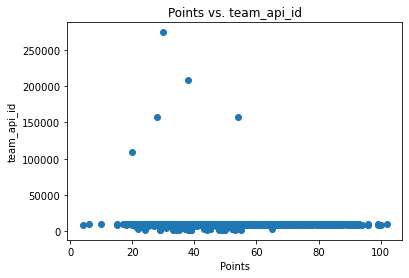

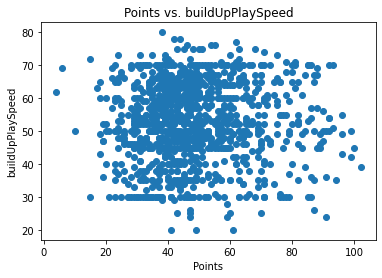

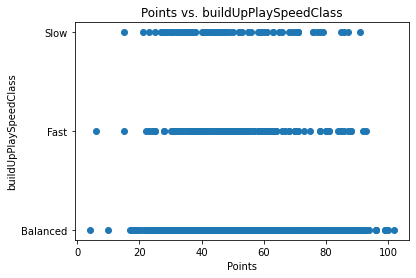

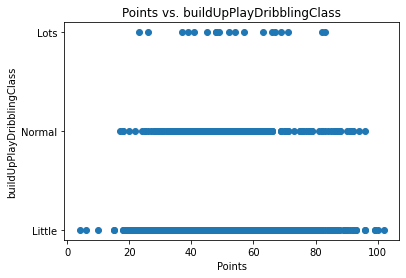

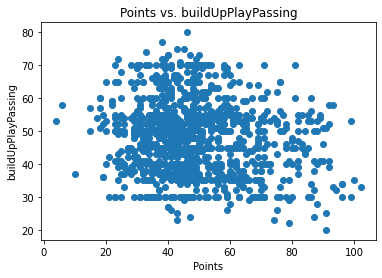

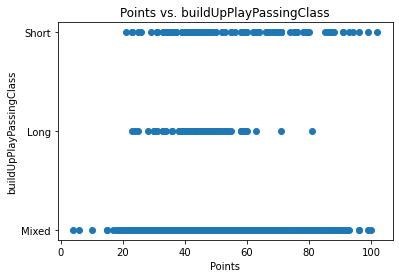

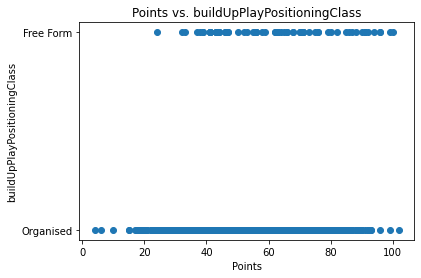

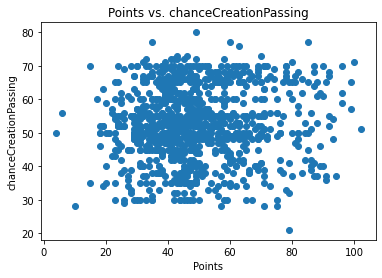

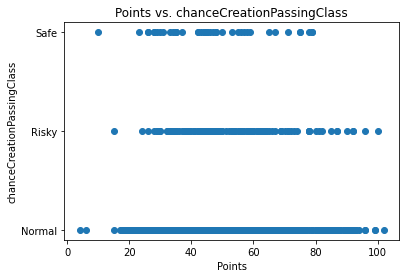

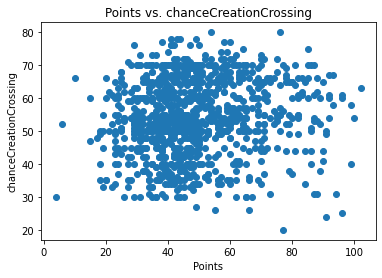

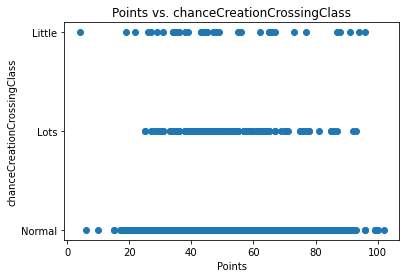

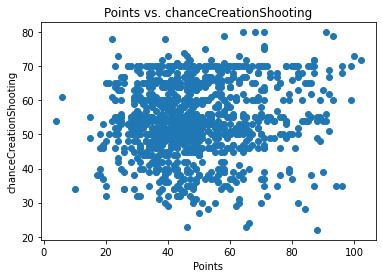

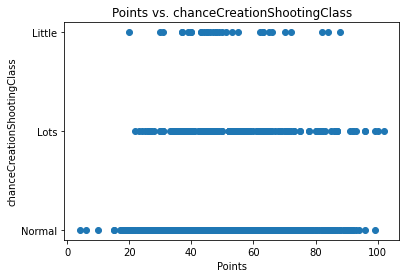

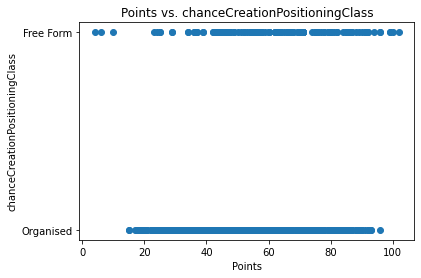

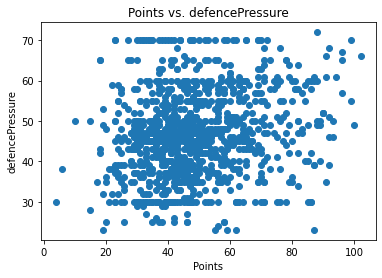

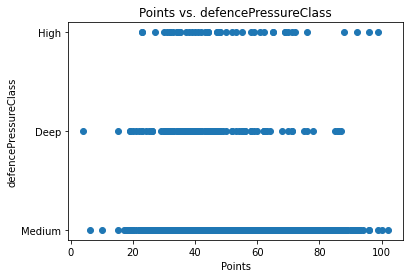

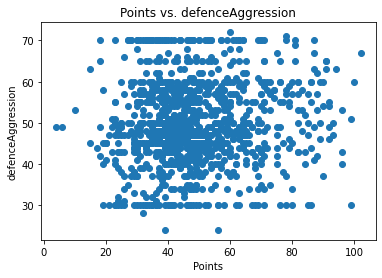

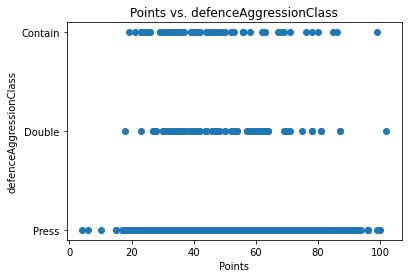

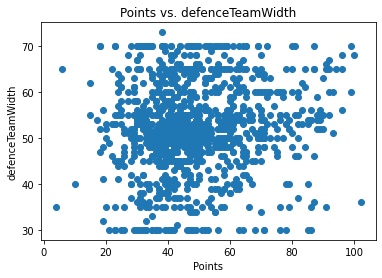

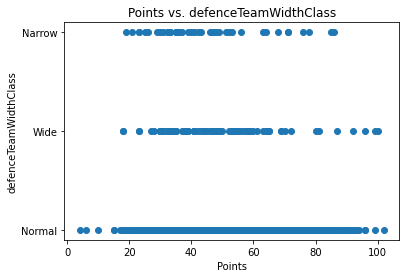

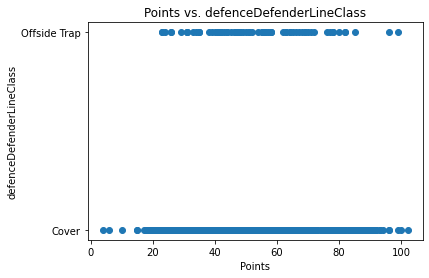

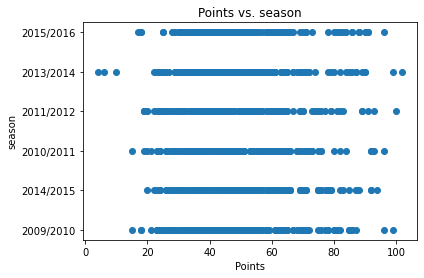

In [32]:
import matplotlib.pyplot as plt

# create scatter plots for each column against the 'points' column
for col in team_attributes_points.columns:
    if col != 'points':
        plt.scatter(team_attributes_points['points'], team_attributes_points[col])
        plt.xlabel('Points')
        plt.ylabel(col)
        plt.title('Points vs. {}'.format(col))
        plt.show()

[Terug naar het begin](#begin)

<AxesSubplot:>

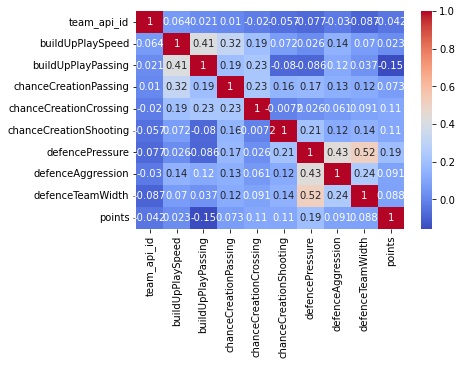

In [36]:
# Compute the correlation matrix for the relevant columns
corr2 = team_attributes_points.corr()

# Plot the correlation matrix using seaborn's heatmap function
sns.heatmap(corr2, cmap='coolwarm', annot=True)